### Import libraries

In [ ]:
# libraries
import pandas as pd
import numpy as np
import cv2
import os, os.path
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# This filepath will likely be different for each of us

# Davis
!unzip '/content/gdrive/MyDrive/MDST/dogs-vs-cats/train.zip' -d 'train_data'


!unzip '/content/gdrive/MyDrive/MDST/dogs-vs-cats/train.zip' -d 'train_data'

In [ ]:
path = "train_data/train"

### Read in dataset

In [90]:
# Read in data
X = [] # input data
y = [] # response variable (dog or cat)
paths = []

for file in os.listdir(path):
  image_path = os.path.join(path, file)

  # to double check that the paths are correctly categorized into dogs/cats
  paths.append(image_path)

  # read image into X
  img = cv2.imread(image_path) 
  grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  resized_img = cv2.resize(grayscale, dsize = [80, 80])
  X.append(resized_img)

  # add label to y
  if("cat" in image_path):
    y.append(0)
  elif("dog" in image_path):
    y.append(1)
  else:
    print("This image isn't a cat or a dog!")


### Verify the input data

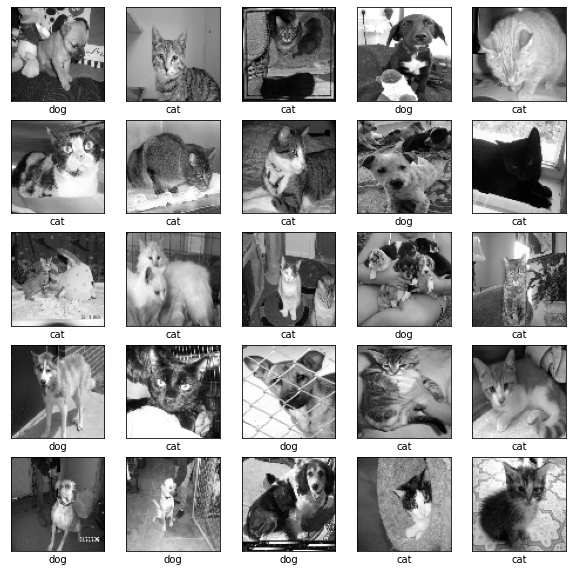

In [91]:
class_names = ['cat', 'dog']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i], cmap="gray")
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y[i]])
plt.show()

### Normalizing the data
In this section, we cast X and y into numpy arrays. X contains images that have all been resized to 80x80. 

Then we normalize all of the pixel values to be between 0 and 1 (instead of 0 and 255). 

Then we split the data into training and testing data so we can test our model later on. We've set aside 20% of the data for testing. 

In [92]:
# Cast X and y to numpy arrays
num_train_img = len(X)
X = np.array(X).reshape(num_train_img, 80, 80, 1)
y = np.array(y)

In [93]:
# Normalize pixel values to be between 0 and 1
X, y = X / 255.0, y / 255.0

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

### Building the model

In [99]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(80, 80, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [100]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 78, 78, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 39, 39, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-trai